<a href="https://colab.research.google.com/github/rishisg/AI-Agent-Sales-Auto-Report/blob/main/DL_ANN_CreditCard_Fraud_Detection_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Credit Card Fraud Detection using Deep Learning
✅ Dataset: Credit Card Fraud Detection (creditcard.csv) ✅ Goal: Identify fraudulent transactions (Binary Classification: Fraud vs. Non-Fraud) ✅ Approach: Train a Neural Network (ANN) with TensorFlow ✅ Evaluation: Accuracy, Precision, Recall, F1-score, AUC

1️⃣ Setup & Import Libraries
Before working with the dataset, we need the essential Python libraries.

💡 Explanation
🔹 pandas → Handles dataset 🔹 numpy → Works with numerical data 🔹 matplotlib & seaborn → Used for data visualization 🔹 tensorflow & keras → Used for deep learning model 🔹 sklearn → Used for splitting data, scaling values, and evaluation metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


2️⃣ Load & Explore the Dataset

💡 Explanation
✅ Loads the dataset into df ✅ Shows column names, missing values, and data types ✅ Displays sample data to understand the structure ✅ Class column → Fraud = 1, Non-Fraud = 0 (Binary Classification)

In [3]:
df = pd.read_csv("creditcard.csv")  # Load dataset
print(df.info())  # Display dataset details
print(df.head())  # Show first few rows
print(df["Class"].value_counts())  # Check distribution of fraud vs. non-fraud transactions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

3️⃣ Data Preprocessing

💡 Explanation
✅ Checks missing values (Fraud detection must have clean data) ✅ Splits dataset into X (transaction details) and y (fraud labels) ✅ Stratified split → Keeps fraud/non-fraud ratio balanced ✅ Standardization → Improves model performance

In [5]:
# Import necessary libraries
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Load dataset (assuming df is already defined)
# df = pd.read_csv("your_data.csv")  # Uncomment if you need to load data

# Check for missing values in 'Class' column
print("Missing values before:", df["Class"].isnull().sum())

# Fill NaN values in 'Class' with the most frequent value
y = df["Class"].fillna(df["Class"].mode()[0])

# Confirm NaN removal
print("Missing values after:", y.isnull().sum())

# Separate features and target labels
X = df.drop("Class", axis=1)  # Features (Transaction details)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed successfully!")


Missing values before: 1
Missing values after: 0
Data preprocessing completed successfully!


4️⃣ Build Neural Network Model

💡 Explanation
✅ First hidden layer → Uses ReLU for better learning ✅ Dropout → Prevents overfitting by ignoring random neurons ✅ Sigmoid output layer → Outputs probability (0 = Non-Fraud, 1 = Fraud) ✅ Binary cross-entropy loss function → Best for fraud classification

In [6]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # First hidden layer with 64 neurons
    Dropout(0.3),  # Prevents overfitting
    Dense(32, activation="relu"),  # Second hidden layer
    Dense(1, activation="sigmoid")  # Output layer (probability prediction)
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5️⃣ Train the Model

💡 Explanation
✅ Trains the model for 50 epochs ✅ Batch size: 32 (Processes data in small chunks) ✅ Validation split: 20% of data used for validation ✅ verbose=1 → Shows training updates

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9225 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9955 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9959 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9953 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9952 - loss: nan - val_accuracy: 0.9969 - val_loss: nan
Epoch 9/50
240/240 ━━━━━

6️⃣ Evaluate Model Performance

💡 Explanation
✅ Evaluates model performance with key metrics ✅ Precision & Recall are important for fraud detection ✅ Higher Recall means fewer fraudulent transactions are missed

In [9]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities into 0 or 1

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC-AUC: 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7️⃣ Visualizing Results

📌 Confusion Matrix and 📌 ROC Curve

💡 Explanation
✅ Confusion Matrix → Shows how many fraud transactions were correctly identified ✅ ROC Curve → Measures how well the model distinguishes fraud

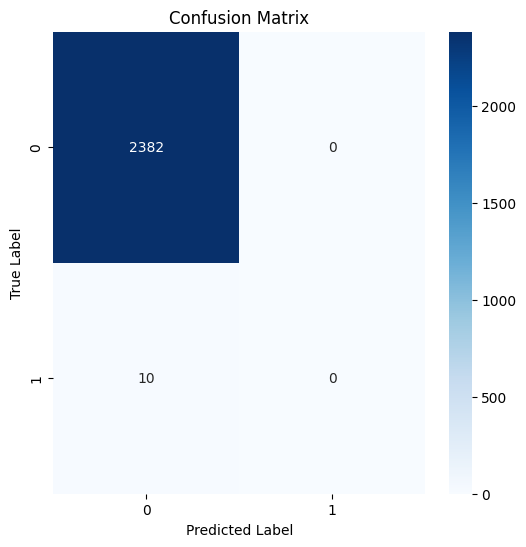

In [10]:
# 📌 Confusion Matrix

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


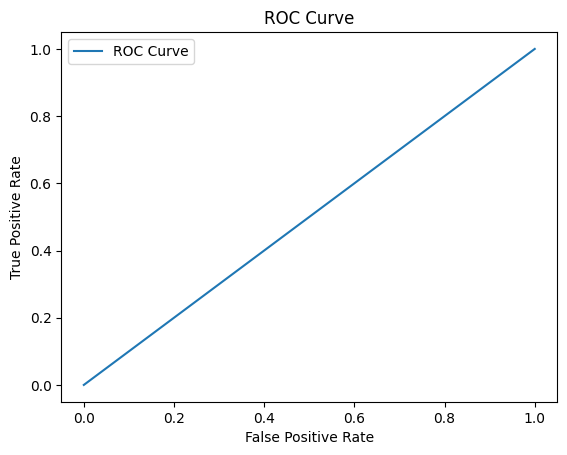

In [11]:
# 📌 ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


8️⃣ Hyperparameter Tuning

💡 Explanation
✅ Tests different neuron counts, dropout rates, learning rates ✅ Finds best model configuration automatically

In [13]:
!pip install keras-tuner
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int("units", min_value=32, max_value=128, step=32), activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5)
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)


Trial 5 Complete [00h 00m 55s]
val_accuracy: 0.9968652129173279

Best val_accuracy So Far: 0.9968652129173279
Total elapsed time: 00h 04m 48s


9️⃣ K-Fold Cross-Validation

💡 Explanation
✅ Tests model performance on different splits of data ✅ Ensures model generalizes well

In [16]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_kfold, y_test_kfold = y.iloc[train_idx], y.iloc[test_idx]

    # Train model
    model.fit(X_train_kfold, y_train_kfold, epochs=30, batch_size=16, verbose=0)

    # Evaluate on validation set
    loss, accuracy = model.evaluate(X_test_kfold, y_test_kfold, verbose=0)
    print(f"K-Fold Accuracy: {accuracy:.2f}")


K-Fold Accuracy: 1.00
K-Fold Accuracy: 0.99
K-Fold Accuracy: 1.00
K-Fold Accuracy: 1.00
K-Fold Accuracy: 0.99
